# FNO Model Evaluation

In [7]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
# import h5py
# from configmypy import ConfigPipeline, YamlConfig, ArgparseConfig
import yaml 
import evaluation_metrics as em

#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')  

In [12]:
# config = YamlConfig("ks_config.yaml").read_conf()[0].default
config = yaml.safe_load(open("ks_config.yaml"))
config["default"]["save_model_path"]

'/scratch/julian/neuralop/ks_models/pygen_full_res.pth'

In [3]:
# load in the data
f = h5py.File(config.data.folder + "KS.mat")
data = torch.tensor(f['u'][:], dtype = torch.float32)

n_train = config.data.n_train
Xtrain = data[:, 99:1999, :n_train].flatten(1, -1).unsqueeze(1).permute(2, 1, 0)
ytrain = data[:, 100:2000, :n_train].flatten(1, -1).unsqueeze(1).permute(2, 1, 0)

n_test = config.data.n_tests[0] # could implement for different resolutions
Xtest = data[:, 99:1999, n_test:].flatten(1, -1).unsqueeze(1).permute(2, 1, 0)
ytest = data[:, 100:2000, n_test:].flatten(1, -1).unsqueeze(1).permute(2, 1, 0)


In [22]:
# load model 
model = torch.load("fno_ks.pth")

/tmp/ipykernel_1645206/3136758204.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("fno_ks.pth")


In [33]:
# load data
sample = data[:, :, -1]
sample_preds = sample.clone()

for i in range(500, 1999):
    sample_preds[:, i+1] = model(sample_preds[:, i].unsqueeze(0).unsqueeze(0).to(device))

tensor(-8.6427e-10)
tensor(-0.0245, grad_fn=<MeanBackward0>)


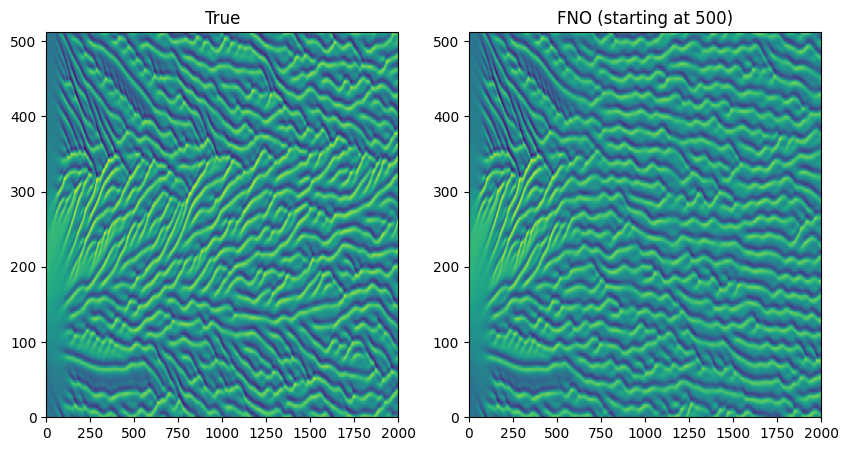

In [35]:
# visualize 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pcolormesh(sample)
ax[0].set_title("True")
ax[1].pcolormesh(sample_preds.detach().numpy())
ax[1].set_title("FNO (starting at 500)")
print(torch.mean(sample))
print(torch.mean(sample_preds))

Histogram Kolmogorov-Smirnov Error: 0.035, p-value: 0
TKE Kolmogorov-Smirnov Error: 0.51, p-value: 5.6e-60
Max Error in Spectrum: 2.8e+03 at frequency 0.091
Mean Squared Error in Autocorrelation: 3.4e+02


(<Figure size 700x600 with 1 Axes>,
 <Figure size 700x600 with 1 Axes>,
 <Figure size 800x800 with 1 Axes>,
 <Figure size 800x800 with 1 Axes>,
 KstestResult(statistic=0.03541406250000001, pvalue=0.0, statistic_location=1.8594844, statistic_sign=-1),
 KstestResult(statistic=0.505859375, pvalue=5.61289082074629e-60, statistic_location=1.5847522, statistic_sign=-1))

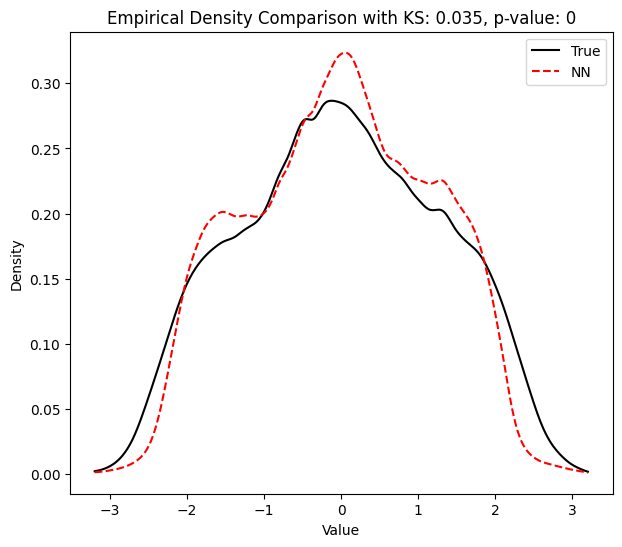

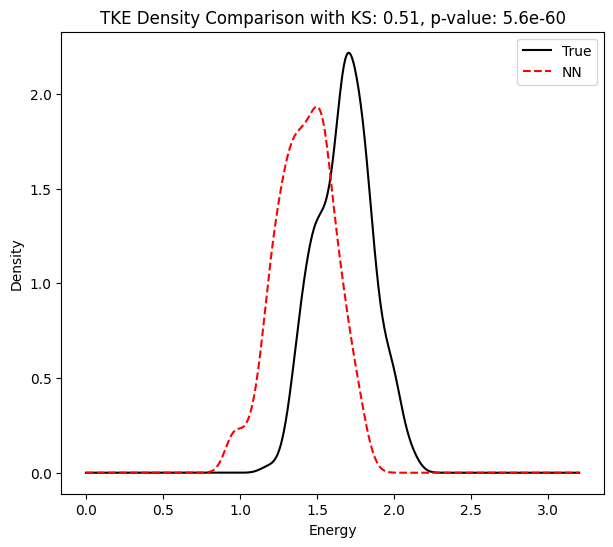

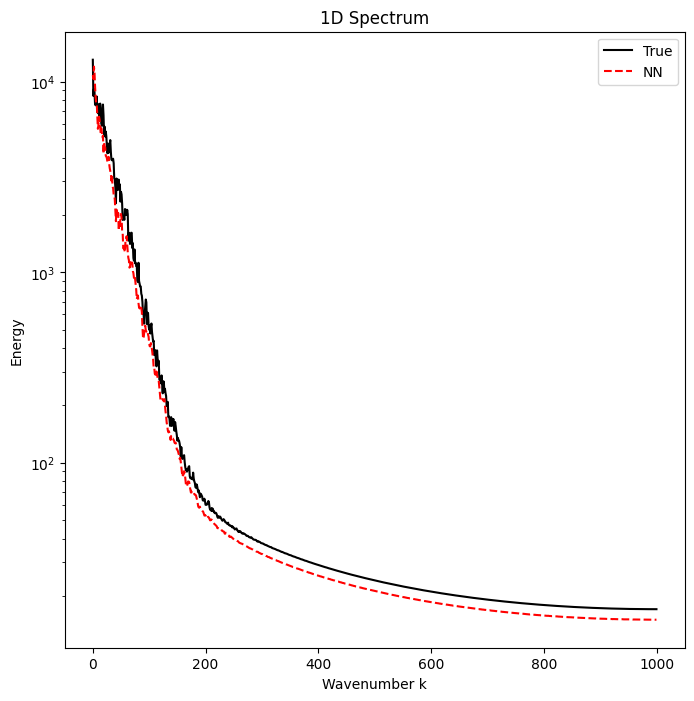

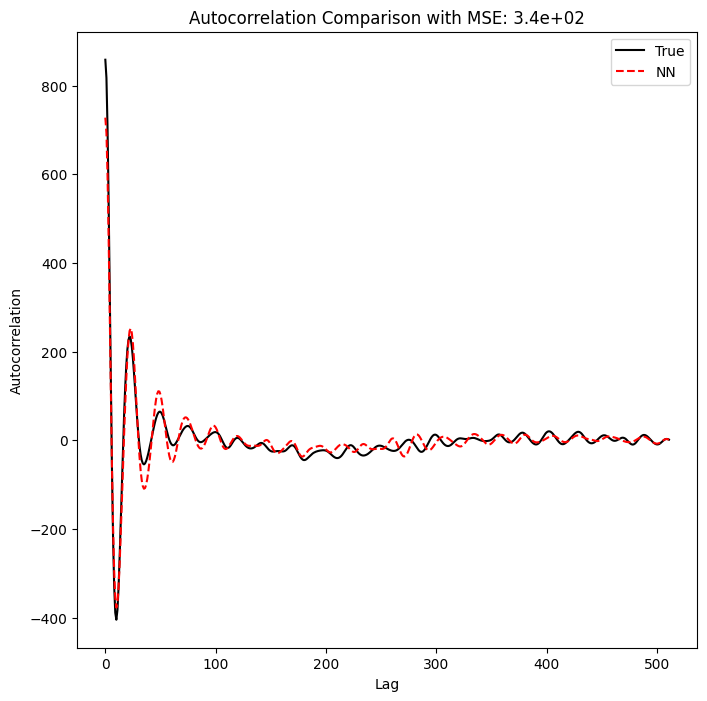

In [39]:
# report evaluation metrics
em.evaluate_metrics(sample.detach().numpy(), sample_preds.detach().numpy())

In [47]:
# load 100 epoch model 
model100 = torch.load("fno_ks_100.pth")

sample = data[:, :, -2]
sample_preds2 = sample.clone()

for i in range(500, 1999):
    sample_preds2[:, i+1] = model100(sample_preds2[:, i].unsqueeze(0).unsqueeze(0).to(device))

/tmp/ipykernel_1645206/979068693.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model100 = torch.load("fno_ks_100.pth")


tensor(-4.5206e-09)
tensor(-0.0345, grad_fn=<MeanBackward0>)


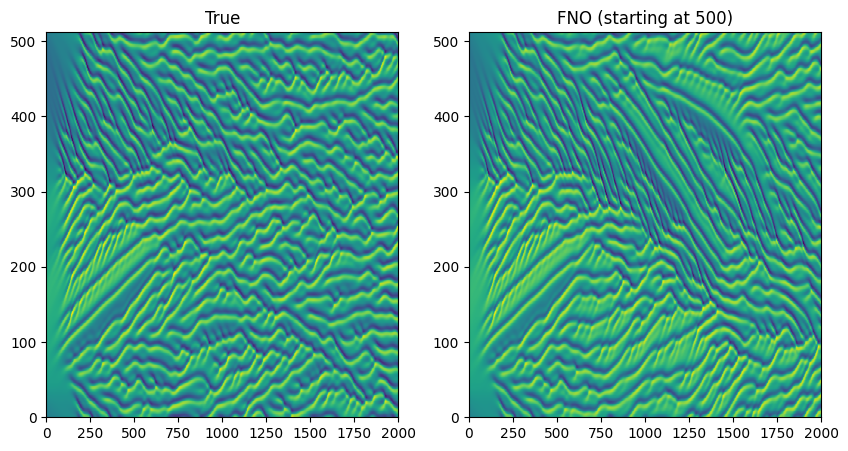

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pcolormesh(sample)
ax[0].set_title("True")
ax[1].pcolormesh(sample_preds2.detach().numpy())
ax[1].set_title("FNO (starting at 500)")
print(torch.mean(sample))
print(torch.mean(sample_preds2))

Histogram Kolmogorov-Smirnov Error: 0.022, p-value: 3e-219
TKE Kolmogorov-Smirnov Error: 0.17, p-value: 1e-06
Max Error in Spectrum: 1.9e+03 at frequency 0.091
Mean Squared Error in Autocorrelation: 6e+02


(<Figure size 700x600 with 1 Axes>,
 <Figure size 700x600 with 1 Axes>,
 <Figure size 800x800 with 1 Axes>,
 <Figure size 800x800 with 1 Axes>,
 KstestResult(statistic=0.0221806640625, pvalue=3.004753543891612e-219, statistic_location=-2.2510169, statistic_sign=-1),
 KstestResult(statistic=0.16796875, pvalue=1.0089816248606041e-06, statistic_location=1.5415258, statistic_sign=1))

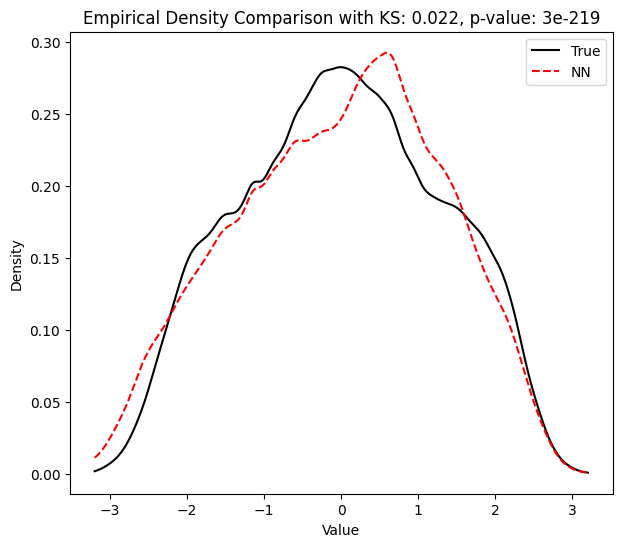

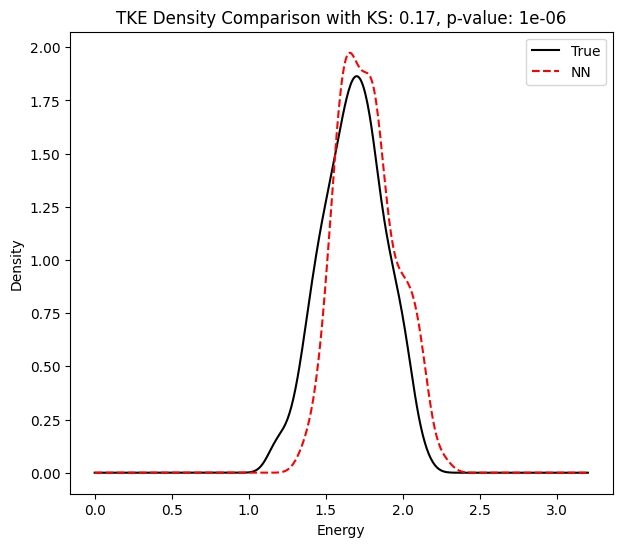

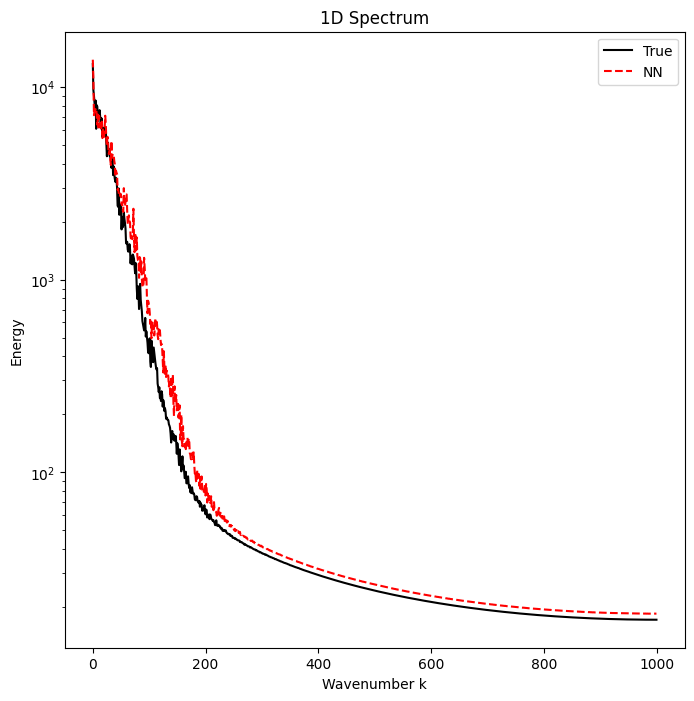

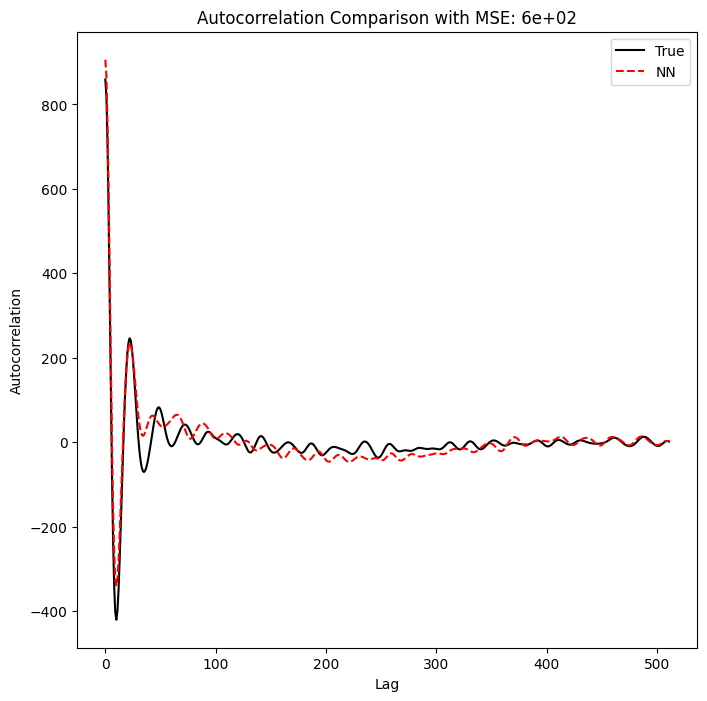

In [49]:
em.evaluate_metrics(sample.detach().numpy(), sample_preds2.detach().numpy())

In [4]:
# load 100 epoch model 
modelwide = torch.load("fno_ks_wider.pth")

sample = data[:, :, -2]
sample_preds3 = sample.clone()

for i in range(500, 1999):
    sample_preds3[:, i+1] = modelwide(sample_preds3[:, i].unsqueeze(0).unsqueeze(0).to(device))

/tmp/ipykernel_304506/1703058798.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelwide = torch.load("fno_ks_wider.pth")


In [5]:
from neuralop.utils import get_wandb_api_key, count_model_params

count_model_params(modelwide)

8752769

tensor(-4.5206e-09)
tensor(-0.0006, grad_fn=<MeanBackward0>)


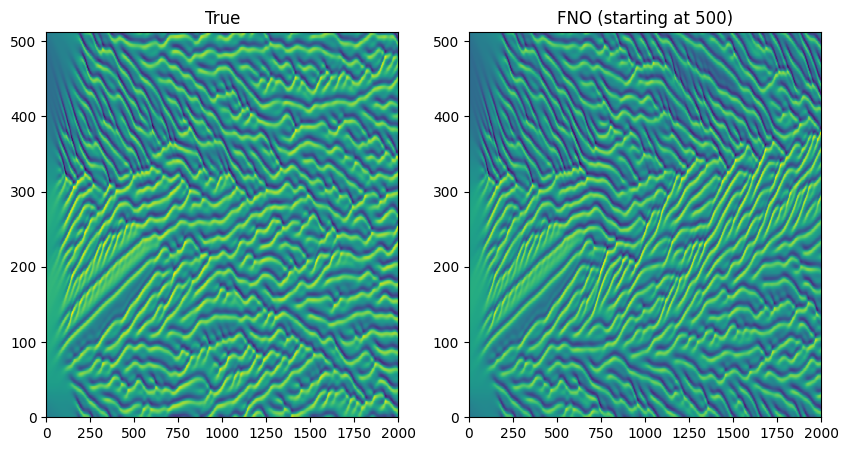

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pcolormesh(sample)
ax[0].set_title("True")
ax[1].pcolormesh(sample_preds3.detach().numpy())
ax[1].set_title("FNO (starting at 500)")
print(torch.mean(sample))
print(torch.mean(sample_preds3))

Histogram Kolmogorov-Smirnov Error: 0.015, p-value: 2e-100
TKE Kolmogorov-Smirnov Error: 0.3, p-value: 7.8e-21
Max Error in Spectrum: 2.9e+03 at frequency 0
Mean Squared Error in Autocorrelation: 3.1e+02


(<Figure size 700x600 with 1 Axes>,
 <Figure size 700x600 with 1 Axes>,
 <Figure size 800x800 with 1 Axes>,
 <Figure size 800x800 with 1 Axes>,
 KstestResult(statistic=np.float64(0.01499414062500004), pvalue=np.float64(2.0344409178107514e-100), statistic_location=np.float32(2.312548), statistic_sign=np.int8(1)),
 KstestResult(statistic=np.float64(0.30078125), pvalue=np.float64(7.764028842271995e-21), statistic_location=np.float32(1.8306172), statistic_sign=np.int8(1)))

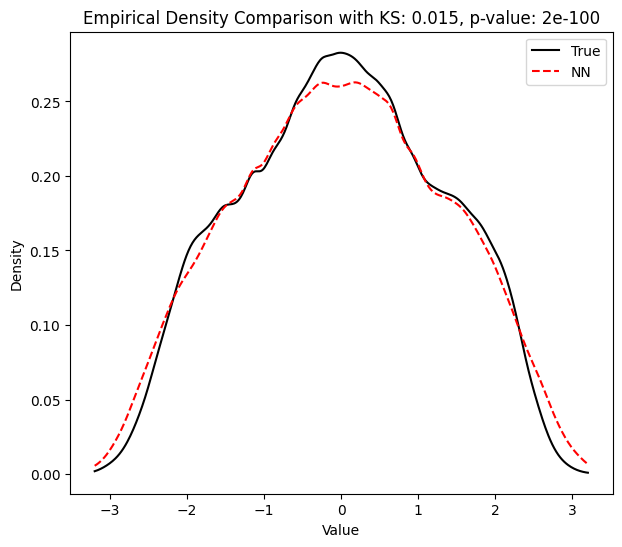

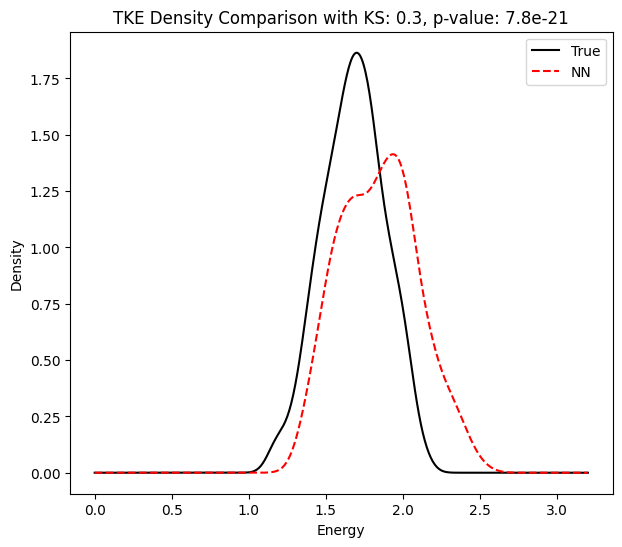

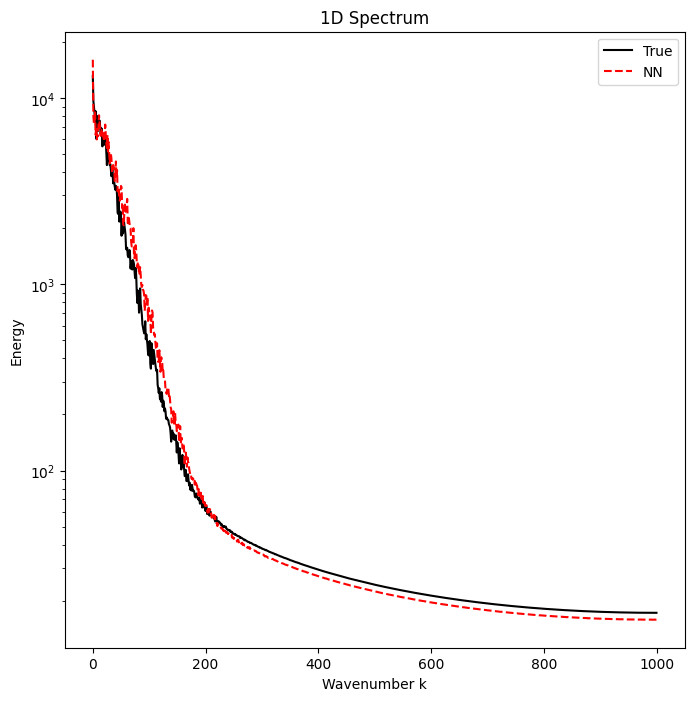

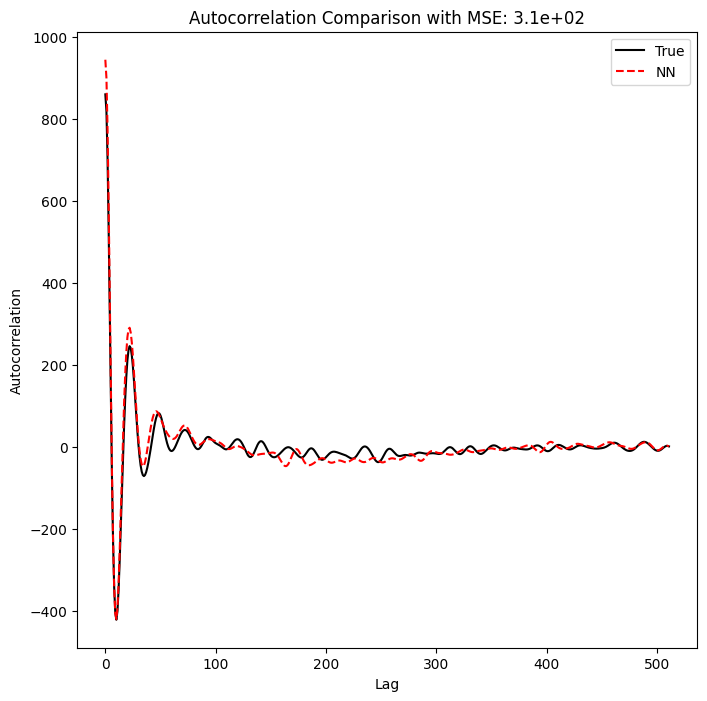

In [9]:
em.evaluate_metrics(sample.detach().numpy(), sample_preds3.detach().numpy())

In [16]:
# load data 
data = torch.load("/scratch/julian/neuralop/pygen_1200_512_2000_20_201.06.pth").to(torch.float32).permute(2, 1, 0)

In [18]:
model = torch.load("/scratch/julian/neuralop/ks_models/pygen_1200_512_2000_20_201.06.pth")


sample = data[:, :, -2]
sample_preds3 = sample.clone().to(device)

for i in range(500, 1999):
    sample_preds3[:, i+1] = model(sample_preds3[:, i].unsqueeze(0).unsqueeze(0))

/tmp/ipykernel_941199/3478294718.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("/scratch/julian/neuralop/ks_models/pygen_1200_512_2000_20_201.06.pth

tensor(0.0003)
tensor(0.0099, device='cuda:0', grad_fn=<MeanBackward0>)


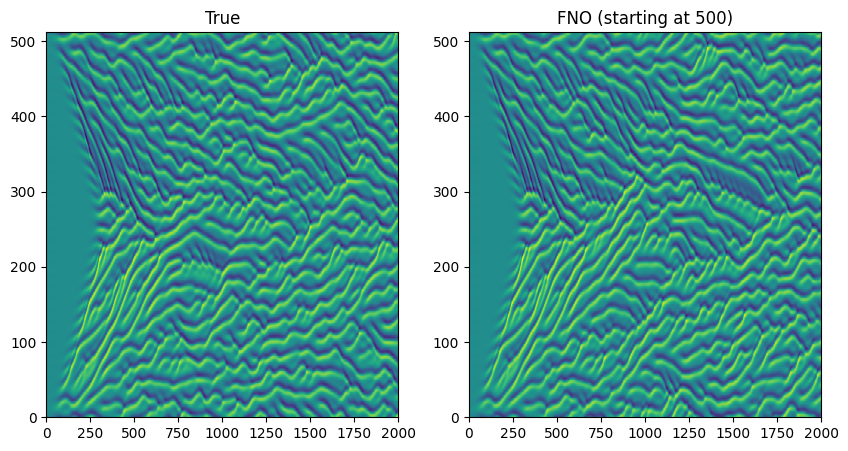

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pcolormesh(sample)
ax[0].set_title("True")
ax[1].pcolormesh(sample_preds3.cpu().detach().numpy())
ax[1].set_title("FNO (starting at 500)")
print(torch.mean(sample))
print(torch.mean(sample_preds3))

Histogram Kolmogorov-Smirnov Error: 0.0056, p-value: 2.8e-14
TKE Kolmogorov-Smirnov Error: 0.08, p-value: 0.075
Max Error in Spectrum: 1.9e+03 at frequency 0
Mean Squared Error in Autocorrelation: 1.6e+02


(<Figure size 700x600 with 1 Axes>,
 <Figure size 700x600 with 1 Axes>,
 <Figure size 800x800 with 1 Axes>,
 <Figure size 800x800 with 1 Axes>,
 KstestResult(statistic=np.float64(0.005580078125000054), pvalue=np.float64(2.8316092819861835e-14), statistic_location=np.float32(2.3343225), statistic_sign=np.int8(1)),
 KstestResult(statistic=np.float64(0.080078125), pvalue=np.float64(0.07498929176491581), statistic_location=np.float32(1.5804428), statistic_sign=np.int8(-1)))

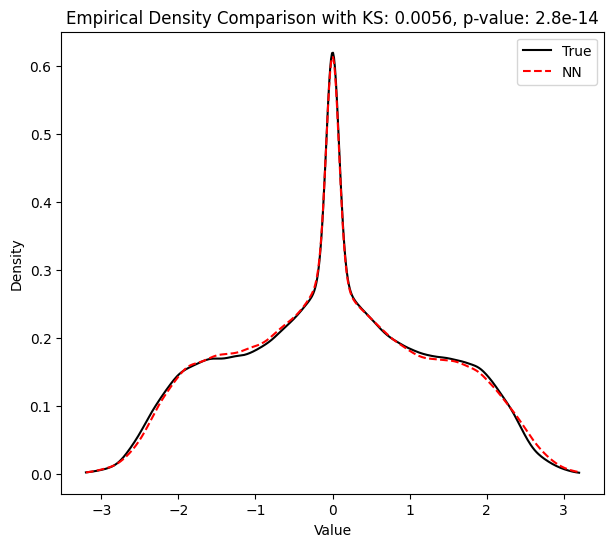

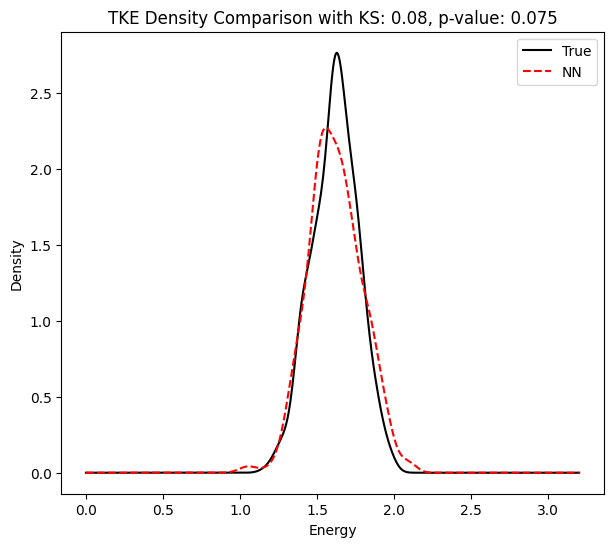

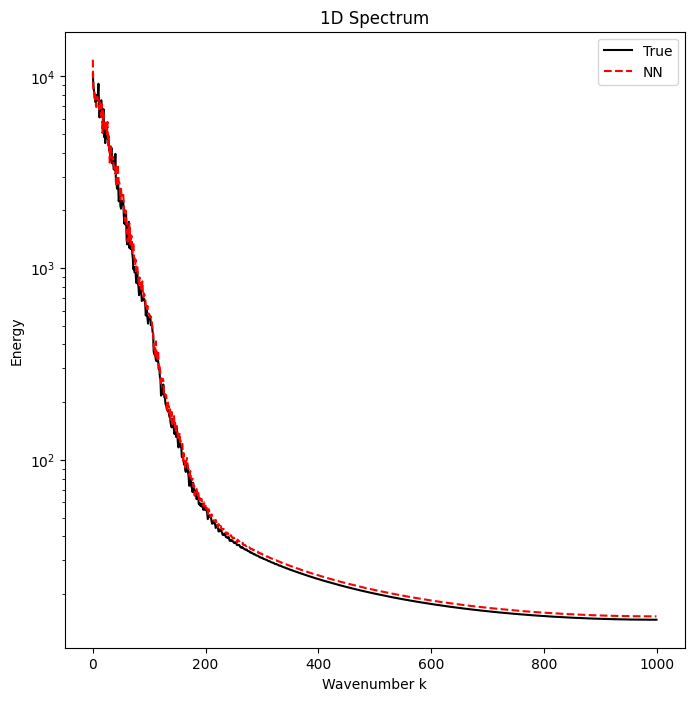

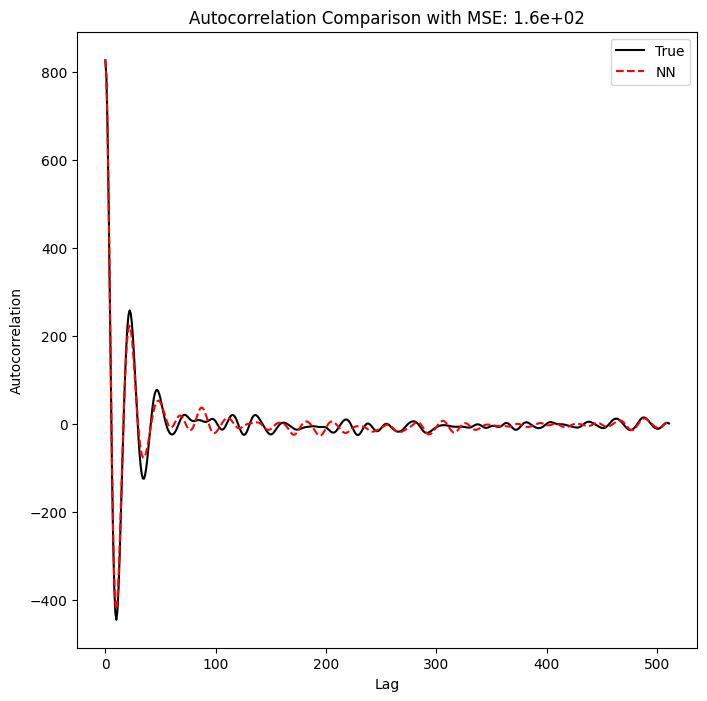

In [21]:
# compute em metrics 
em.evaluate_metrics(sample.cpu().detach().numpy(), sample_preds3.cpu().detach().numpy())

In [59]:
big_dim = 10000
sample[:, :500].shape
sample_preds3 = torch.zeros((512, big_dim))
sample_preds3[:, :500] = sample[:, :500]

model = model.to(device)

for i in range(499, big_dim-1):
    sample_preds3[:, i+1] = model(sample_preds3[:, i].unsqueeze(0).unsqueeze(0).to(device))

plt.pcolormesh(sample_preds3.detach().cpu().numpy())

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 79.26 GiB of which 19.62 MiB is free. Including non-PyTorch memory, this process has 77.33 GiB memory in use. Process 579205 has 464.00 MiB memory in use. Process 581924 has 1.43 GiB memory in use. Of the allocated memory 73.57 GiB is allocated by PyTorch, and 3.27 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

tensor(0.0003)
tensor(0.0099, device='cuda:0', grad_fn=<MeanBackward0>)


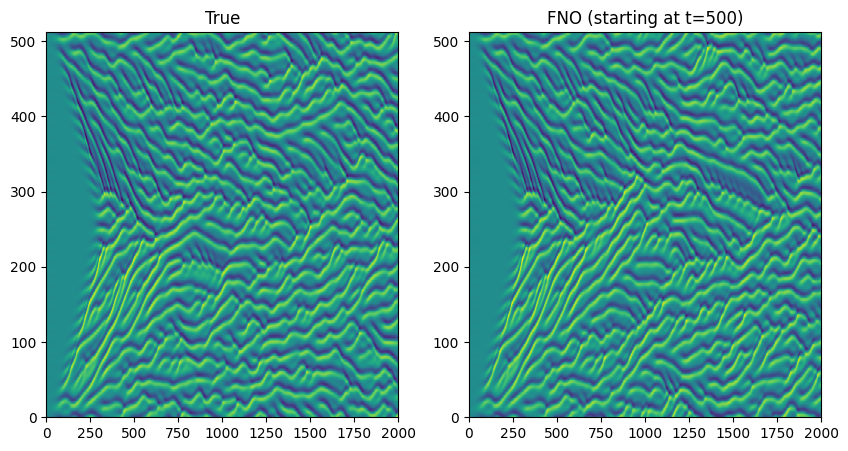

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].pcolormesh(sample)
ax[0].set_title("True")
ax[1].pcolormesh(sample_preds3.to("cpu").detach().numpy())
ax[1].set_title("FNO (starting at t=500)")
print(torch.mean(sample))
print(torch.mean(sample_preds3))

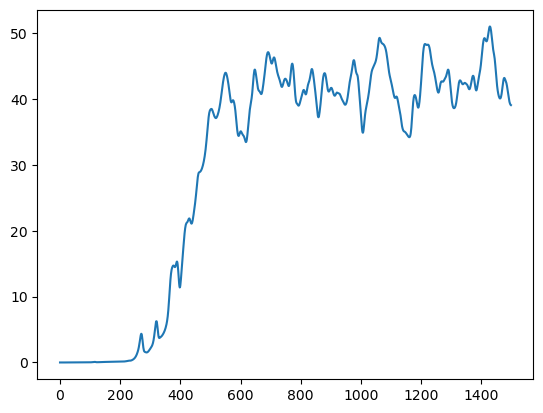

In [27]:
# error propagation assessment
# run the KS equation on slightly perturbed results starting at 500 and see how quickly the error grows
# initial condition is sample at 500
initial_condition = data[:, 500, -2].unsqueeze(0).unsqueeze(0).to(device)
initial_condition_perturbed = initial_condition + 1e-4 * torch.randn_like(initial_condition)

# import physical model stepping 
from KS_solver import KS_step
from jax_models import *
n_samples = 1200
n_points = 512
l = 2 * np.pi * 32  # domain length
dt = .25  # time step size
modes = 20
T = 2000  # total simulation time
width = 512
KS = KuramotoSivashinsky(dt=dt, s=width, l=l, M=modes)

# run the KS model on the initial condition
physical_results = KS_step(KS, 1499, initial_condition.squeeze().cpu().numpy())
physical_results_perturbed = KS_step(KS, 1499, initial_condition_perturbed.squeeze().cpu().numpy())

# l2 loss between the two
l2_loss = np.linalg.norm(physical_results - physical_results_perturbed, axis = 1)
plt.plot(l2_loss)
# ml_perturbed = data[:, :, 0].shape
# model(data[:, 500, -2].unsqueeze(0).unsqueeze(0).to(device))

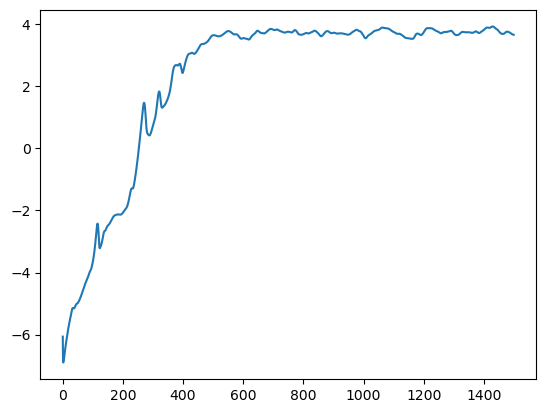

In [30]:
plt.plot(np.log(l2_loss))

In [7]:
# repeat for ml model 
import torch
#data = torch.load("/scratch/julian/neuralop/pygen_1200_512_2000_20_201.06.pth").to(torch.float32).permute(2, 1, 0)

model = torch.load("/scratch/julian/neuralop/ks_models/pygen_1200_512_2000_20_201.06.pth")

initial_condition = data[:, 500, -2].unsqueeze(0).unsqueeze(0).to(device)
initial_condition_perturbed = initial_condition + 1e-4 * torch.randn_like(initial_condition)


ml_perturb_results = torch.zeros((512, 1500))
ml_perturb_results[:, 0] = initial_condition_perturbed.squeeze()
for i in range(0, 1499):
    ml_perturb_results[:, i+1] = model(ml_perturb_results[:, i].unsqueeze(0).unsqueeze(0).to(device))

/tmp/ipykernel_941199/3761255208.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("/scratch/julian/neuralop/ks_models/pygen_1200_512_2000_20_201.06.pth

In [14]:
# compute l2 loss over the time series 
ml_perturb_results = ml_perturb_results
l2_loss_ml = np.linalg.norm(ml_perturb_results - data[:, 500:, -2].detach().numpy(), axis = 0)

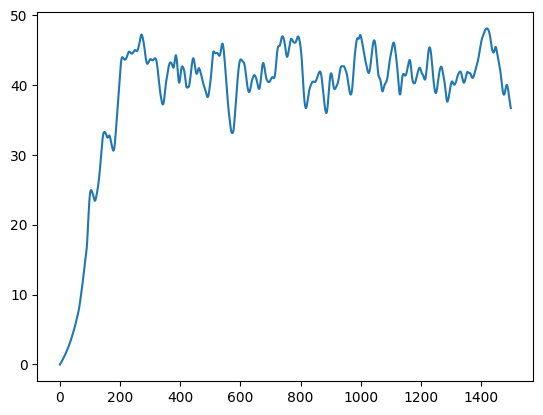

In [ ]:
plt.plot(np.log(l2_loss_ml))